In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from lmfit.models import LinearModel, VoigtModel
from lmfit import minimize, Parameters

Populating the interactive namespace from numpy and matplotlib


[[Model]]
    ((Model(voigt, prefix='vo1_') + Model(voigt, prefix='vo2_')) + Model(linear, prefix='lin_'))
[[Fit Statistics]]
    # function evals   = 484
    # data points      = 190
    # variables        = 8
    chi-square         = 28015915.647
    reduced chi-square = 153933.602
[[Variables]]
    lin_slope:       53.0838599 +/- 0.838016 (1.58%) (init= 57.40641)
    lin_intercept:   13949.4033 +/- 130.8137 (0.94%) (init= 21876.16)
    vo1_amplitude:   1.4214e+06 +/- 3.77e+05 (26.54%) (init= 40000)
    vo1_sigma:       11.2004228 +/- 0.519817 (4.64%) (init= 50)
    vo1_center:      191.977895 +/- 1.049087 (0.55%) (init= 160)
    vo1_gamma:       11.2004228 +/- 0.519817 (4.64%)  == 'vo1_sigma'
    vo1_fwhm:        40.3361949 +/- 1.872025 (4.64%)  == '3.6013100*vo1_sigma'
    vo2_amplitude:   3.9308e+05 +/- 4.19e+05 (106.72%) (init= 40000)
    vo2_sigma:       14.6992973 +/- 3.538397 (24.07%) (init= 50)
    vo2_center:      212.217094 +/- 15.61015 (7.36%) (init= 180)
    vo2_gamma:   

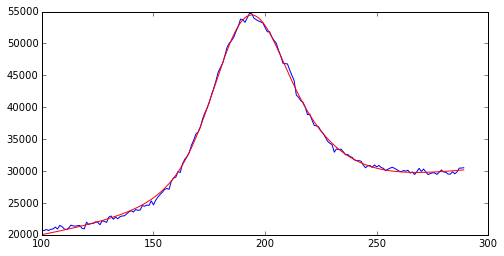

In [8]:
fig = plt.figure(figsize=[8,4])
ax = fig.add_subplot(111)

with open("/Users/stanpol/Dropbox/Stan-Marina/Mo3p.txt") as f:
	data = np.loadtxt(f, unpack=True)
x = np.array(range(len(data))[100:290])
y = np.array(data[::-1][100:290])

background  = LinearModel(prefix='lin_')
pars = background.guess(y, x=x)

voigt1  = VoigtModel(prefix='vo1_')
pars.update(voigt1.make_params())

pars['vo1_center'].set(160, min=100, max=250)
pars['vo1_sigma'].set(50, min=3)
pars['vo1_amplitude'].set(40000, min=20000)

voigt2  = VoigtModel(prefix='vo2_')
pars.update(voigt2.make_params())

pars['vo2_center'].set(180, min=125, max=250)
pars['vo2_sigma'].set(50, min=3)
pars['vo2_amplitude'].set(40000, min=20000)

mod = voigt1 + voigt2 + background

init = mod.eval(pars, x=x)
plt.plot(x, y)

out = mod.fit(y, pars, x=x)

print(out.fit_report(min_correl=0.5))

plt.plot(x, out.best_fit, 'r-')
plt.show()

[[Model]]
    ((((Model(voigt, prefix='vo1_') + Model(voigt, prefix='vo2_')) + Model(voigt, prefix='vo3_')) + Model(voigt, prefix='vo4_')) + Model(linear, prefix='lin_'))
[[Fit Statistics]]
    # function evals   = 15139
    # data points      = 350
    # variables        = 14
    chi-square         = 35529427.717
    reduced chi-square = 105742.344
[[Variables]]
    lin_slope:       10.6608828 +/- 16.35815 (153.44%) (init= 28.83002)
    lin_intercept:   16594.7033 +/- 275.2508 (1.66%) (init= 26992.33)
    vo1_amplitude:   3.5223e+05 +/- 1.85e+05 (52.60%) (init= 40000)
    vo1_sigma:       19.2194970 +/- 4.130029 (21.49%) (init= 50)
    vo1_center:      223.691847 +/- 10.05218 (4.49%) (init= 160)
    vo1_gamma:       19.2194970 +/- 4.130029 (21.49%)  == 'vo1_sigma'
    vo1_fwhm:        69.2153668 +/- 14.87351 (21.49%)  == '3.6013100*vo1_sigma'
    vo2_amplitude:   1.6929e+06 +/- 1.29e+05 (7.64%) (init= 40000)
    vo2_sigma:       12.0162488 +/- 0.242593 (2.02%) (init= 50)
    vo2_cente

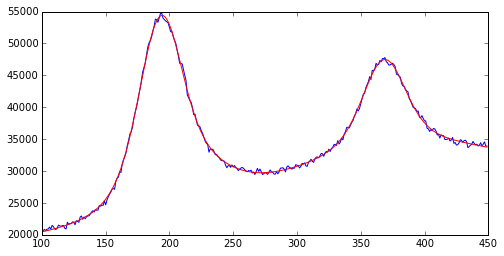

In [9]:
fig = plt.figure(figsize=[8,4])
ax = fig.add_subplot(111)

with open("/Users/stanpol/Dropbox/Stan-Marina/Mo3p.txt") as f:
	data = np.loadtxt(f, unpack=True)
x = np.array(range(len(data))[100:450])
y = np.array(data[::-1][100:450])

background  = LinearModel(prefix='lin_')
pars = background.guess(y, x=x)

voigt1  = VoigtModel(prefix='vo1_')
pars.update(voigt1.make_params())

pars['vo1_center'].set(160, min=100, max=250)
pars['vo1_sigma'].set(50, min=3)
pars['vo1_amplitude'].set(40000, min=20000)

voigt2  = VoigtModel(prefix='vo2_')
pars.update(voigt2.make_params())

pars['vo2_center'].set(180, min=125, max=250)
pars['vo2_sigma'].set(50, min=3)
pars['vo2_amplitude'].set(40000, min=20000)

voigt3  = VoigtModel(prefix='vo3_')
pars.update(voigt3.make_params())

pars['vo3_center'].set(360, min=320, max=400)
pars['vo3_sigma'].set(50, min=3)
pars['vo3_amplitude'].set(40000, min=20000)

voigt4  = VoigtModel(prefix='vo4_')
pars.update(voigt4.make_params())

pars['vo4_center'].set(380, min=320, max=400)
pars['vo4_sigma'].set(50, min=3)
pars['vo4_amplitude'].set(40000, min=20000)


mod = voigt1 + voigt2 + voigt3 + voigt4 + background

init = mod.eval(pars, x=x)
plt.plot(x, y)

out = mod.fit(y, pars, x=x)

print(out.fit_report(min_correl=0.5))

plt.plot(x, out.best_fit, 'r-')
plt.show()

[[Model]]
    Model(skewed_gaussian, prefix='sg1_')
[[Fit Statistics]]
    # function evals   = 338
    # data points      = 70
    # variables        = 6
    chi-square         = 15991111878.056
    reduced chi-square = 249861123.095
[[Variables]]
    lin_slope:      -106.640619 +/- 0        (0.00%) (init=-106.6406)
    lin_intercept:   79522.9661 +/- 0        (0.00%) (init= 79522.97)
    sg1_amplitude:   5.2289e+06 +/- 0        (0.00%) (init= 140000)
    sg1_sigma:       28.8846074 +/- 0        (0.00%) (init= 10)
    sg1_center:      54.8236174 +/- 0        (0.00%) (init= 70)
    sg1_gamma:       2.81052067 +/- 0        (0.00%) (init= 0)
[[Correlations]] (unreported correlations are <  0.500)



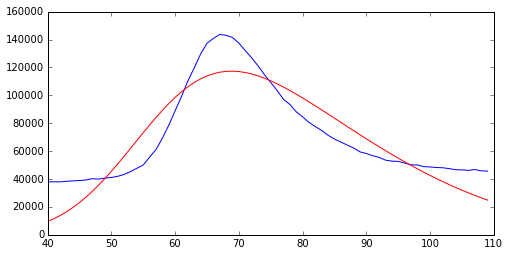

In [7]:
from lmfit.models import LinearModel, VoigtModel, SkewedGaussianModel

fig = plt.figure(figsize=[8,4])
ax = fig.add_subplot(111)

with open("/Users/stanpol/Dropbox/Stan-Marina/O1s.txt") as f:
	data = np.loadtxt(f, unpack=True)
x = np.array(range(len(data))[40:110])
y = np.array(data[::-1][40:110])

background  = LinearModel(prefix='lin_')
pars = background.guess(y, x=x)

sg1  = SkewedGaussianModel(prefix='sg1_')
pars.update(sg1.make_params())

pars['sg1_center'].set(70, min=50, max=100)
pars['sg1_sigma'].set(10, min=3)
pars['sg1_amplitude'].set(140000, min=50000)

mod = sg1

init = mod.eval(pars, x=x)
plt.plot(x, y)

out = mod.fit(y, pars, x=x)

print(out.fit_report(min_correl=0.5))

plt.plot(x, out.best_fit, 'r-')
plt.show()